Chapter 11, 二维可视化
# 常用四种二维可视化方案
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [17]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import plotly.express as px
import plotly.io as pio
pio.kaleido.scope.default_format = "svg"
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 散点

In [18]:
# 从seaborn中导入鸢尾花样本数据
iris_sns = sns.load_dataset("iris") 

### Seaborn

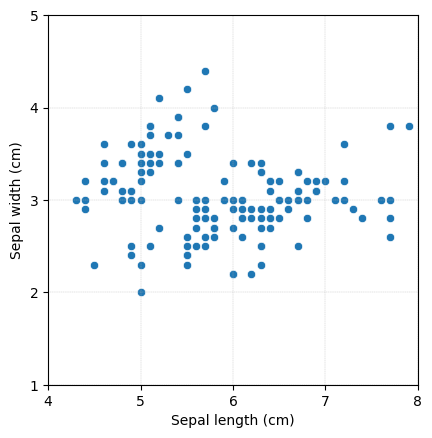

In [18]:
fig, ax = plt.subplots()

ax = sns.scatterplot(data=iris_sns, 
                     x="sepal_length", 
                     y="sepal_width")

# 利用 seaborn.scatterplot() 绘制散点图
# x对应横轴特征，鸢尾花数据帧列名 "sepal_length"
# y对应纵轴特征，鸢尾花数据帧列名 "sepal_width"

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
# 设置横纵轴标签

ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
# 设置横纵轴刻度

ax.axis('scaled')
# 设定横纵轴尺度1:1

ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
# 增加刻度网格，颜色为浅灰 (0.8,0.8,0.8)

ax.set_xbound(lower = 4, upper = 8)
ax.set_ybound(lower = 1, upper = 5)
# 设置横纵轴取值范围
fig.savefig('Figures\Matplotlib绘制样本数据散点图，不加标签.svg', format='svg')


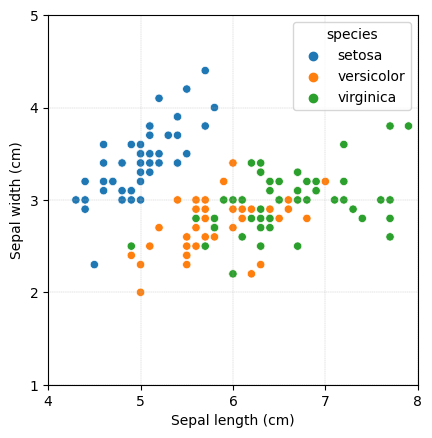

In [17]:
fig, ax = plt.subplots()

ax = sns.scatterplot(data=iris_sns, x="sepal_length", 
                     y="sepal_width", hue = "species")

# hue 用不同色调表达鸢尾花的类别

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
ax.axis('scaled')
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
ax.set_xbound(lower = 4, upper = 8)
ax.set_ybound(lower = 1, upper = 5)

fig.savefig('Figures\Matplotlib绘制样本数据散点图，增加鸢尾花分类标签.svg', format='svg')


### Plotly

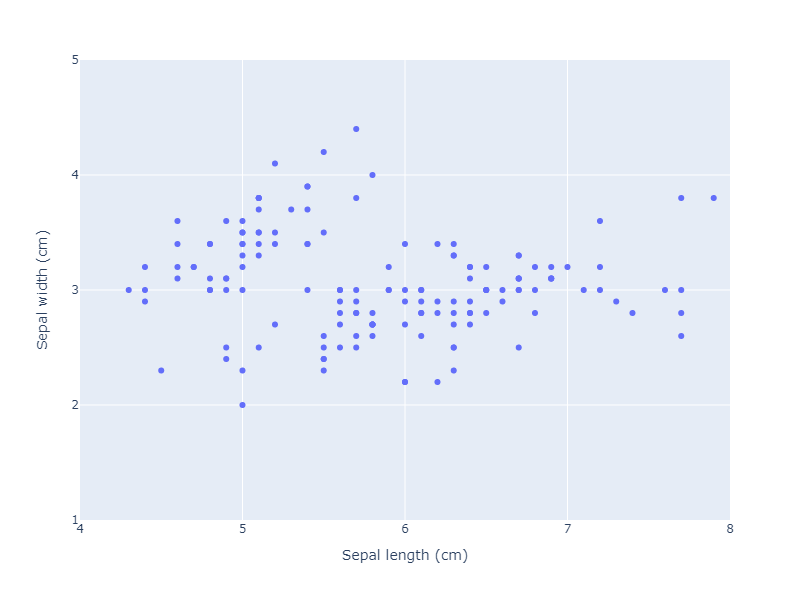

In [30]:

fig = px.scatter(iris_sns, x="sepal_length", y="sepal_width", 
                 width = 600, height = 600,
                 labels={"sepal_length": "Sepal length (cm)",
                         "sepal_width": "Sepal width (cm)"})
# 设置横轴和纵轴范围

fig.update_layout(xaxis_range=[4, 8], 
                  yaxis_range=[1, 5])


fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(4,8+1)))

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(1,5+1)))

fig.show()

# 将fig保存为SVG格式
fig.write_image("Figures\Plotly绘制样本数据散点图，不加标签.svg")

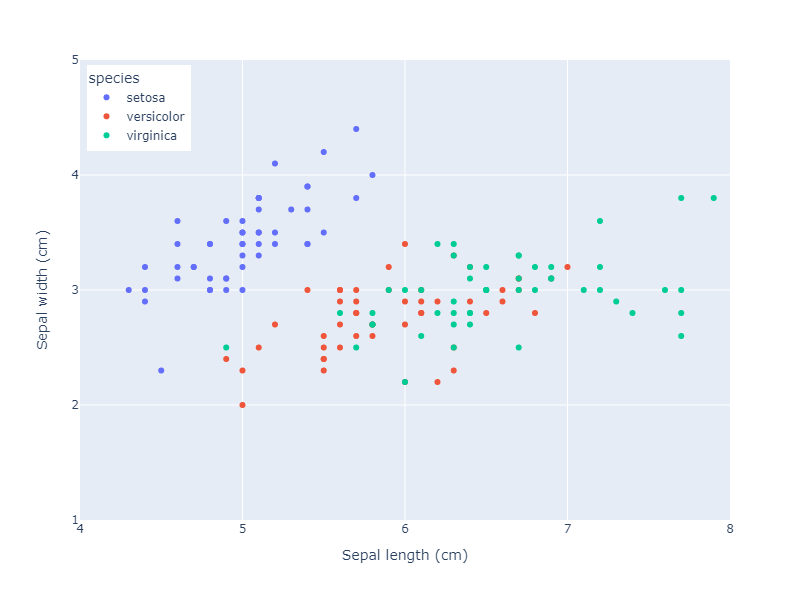

In [32]:

fig = px.scatter(iris_sns, x="sepal_length", y="sepal_width", 
                 color="species",
                 width = 600, height = 600,
                 labels={"sepal_length": "Sepal length (cm)",
                         "sepal_width": "Sepal width (cm)"})
# 设置横轴和纵轴范围
fig.update_layout(xaxis_range=[4, 8], 
                  yaxis_range=[1, 5])


fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(4,8+1)))

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(1,5+1)))

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

# 将fig保存为SVG格式
fig.write_image("Figures\Plotly绘制样本数据散点图，增加鸢尾花分类标签.svg")

## 等高线

In [4]:
# 生成数据
x1_array = np.linspace(-3,3,121)
x2_array = np.linspace(-3,3,121)
# 在 -3 和 3 之间生成等间距的 121 个数值，包括 -3 和 3。
# 这个区间被均匀地分成 121 个间隔，并且生成的数组将包含这些间隔的端点值。
# 换句话说，x1_array 是一个包含 -3 到 3 之间的 121 个数值的一维数组。
# 这些数值是均匀分布的，间隔大小为 (3 - (-3)) / 120 = 0.05。


xx1, xx2 = np.meshgrid(x1_array, x2_array)
# np.meshgrid(x1_array, x2_array) 会接受两个一维数组 x1_array 和 x2_array 作为输入，
# 并生成两个二维数组 xx1 和 xx2。

# xx1 和 xx2 的形状将根据输入数组的长度而确定。
# 其中，xx1 的每个元素都是由 x1_array 中的相应元素组成的行向量，
# 而 xx2 的每个元素都是由 x2_array 中的相应元素组成的列向量。
# 这样，xx1 和 xx2 形成了一个二维网格，其中的每个点都是 x1_array 和 x2_array 中的一对值。

ff = xx1 * np.exp(- xx1**2 - xx2 **2)
# 二元函数

$$ f(x_1, x_2) = x_1 \exp(-x_1^2 - x_2^2)$$

### Matplotlib

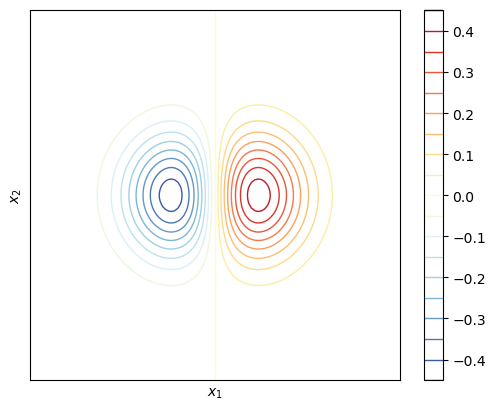

In [15]:
fig, ax = plt.subplots()

CS = ax.contour(xx1, xx2, ff,
           levels = 20,
           cmap = 'RdYlBu_r',
           linewidths = 1)
fig.colorbar(CS)

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/Matplotlib绘制平面等高线.svg', format='svg')

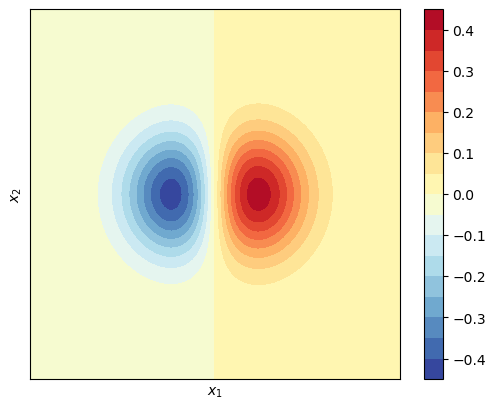

In [14]:
fig, ax = plt.subplots()

CS = ax.contourf(xx1, xx2, ff,
           levels = 20,
           cmap = 'RdYlBu_r')
fig.colorbar(CS)

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/Matplotlib绘制平面填充等高线.svg', format='svg')

### Plotly

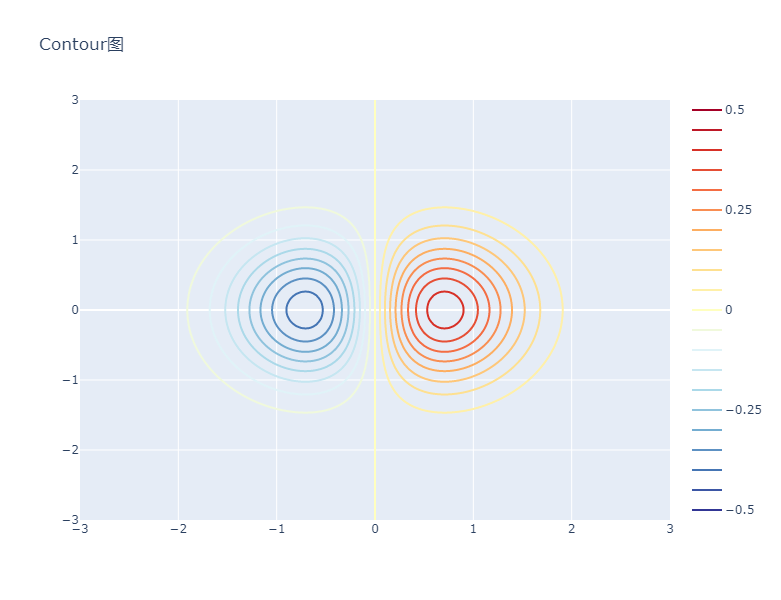

In [12]:
import plotly.graph_objects as go
data = go.Contour(
        z=ff,
        x=x1_array, # horizontal axis
        y=x2_array, # vertical axis
        contours_coloring='lines', # 等高线
        line_width=2,
        colorscale = 'RdYlBu_r',
    contours=dict(
        start=-0.5,  # 级别的起始值
        end=0.5,  # 级别的结束值
        size=0.05,  # 级别之间的间隔
    ))

# 设置横轴和纵轴范围

# 创建布局
layout = go.Layout(
    width=600,  # 设置图形宽度
    height=600,  # 设置图形高度
    title='Contour图',
    xaxis=dict(title=r'$x_1$'),
    yaxis=dict(title=r'$x_2$'),
)

# 创建图形对象
fig = go.Figure(data=data, layout=layout)

fig.show()

# 将fig保存为SVG格式
fig.write_image("Figures\Plotly绘制等高线.svg")

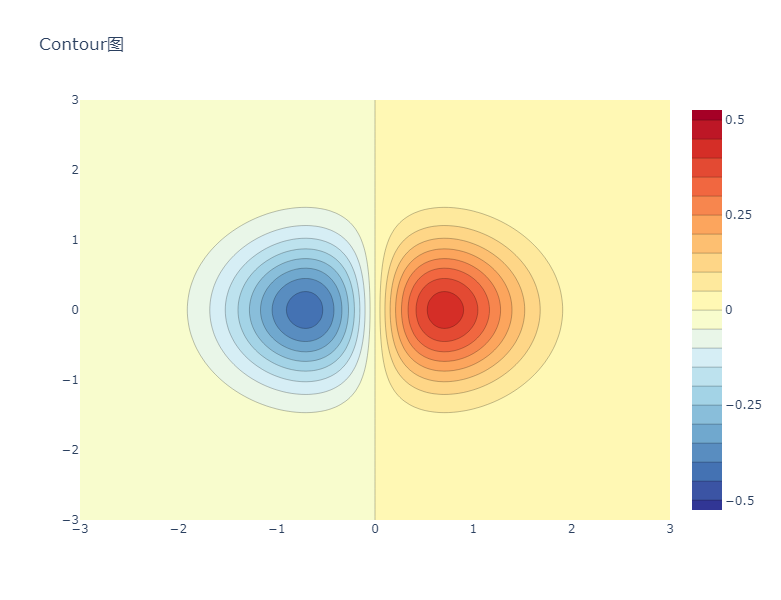

In [13]:

data = go.Contour(
        z=ff,
        x=x1_array, # horizontal axis
        y=x2_array, # vertical axis
        colorscale = 'RdYlBu_r',
        line_width=0.25,
    contours=dict(
        start=-0.5,  # 级别的起始值
        end=0.5,  # 级别的结束值
        size=0.05,  # 级别之间的间隔
    ))

# 设置横轴和纵轴范围

# 创建布局
layout = go.Layout(
    width=600,  # 设置图形宽度
    height=600,  # 设置图形高度
    title='Contour图',
    xaxis=dict(title=r'$x_1$'),
    yaxis=dict(title=r'$x_2$'),
)

# 创建图形对象
fig = go.Figure(data=data, layout=layout)

fig.show()

fig.write_image("Figures\Plotly绘制填充等高线.svg")

## 热图

### Seaborn

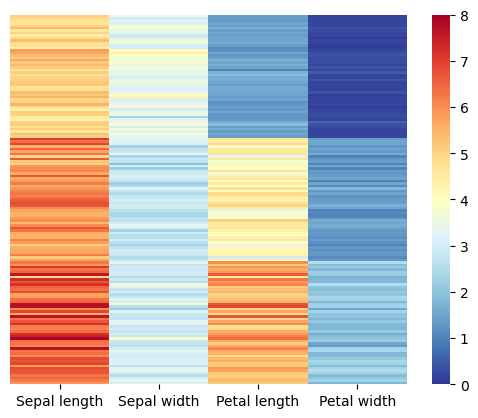

In [41]:
fig, ax = plt.subplots()

ax = sns.heatmap(data=iris_sns.iloc[:,0:-1],
                 vmin = 0, vmax = 8,
                 yticklabels = False,
                 xticklabels = ['Sepal length', 'Sepal width', 
                                'Petal length', 'Petal width'],
                 cmap = 'RdYlBu_r')

fig.savefig('Figures\Seaborn绘制热图.svg', format='svg')

### Plotly

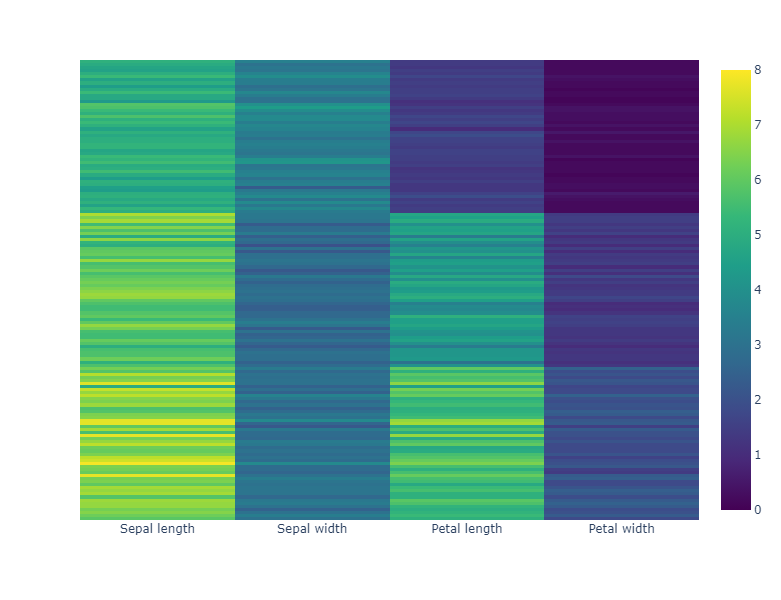

In [38]:
import plotly.express as px

fig = px.imshow(iris_sns.iloc[:,0:-1], text_auto=False,
                width = 600, height = 600,
                x = None,
                zmin=0, zmax=8,
                color_continuous_scale = 'viridis')

# 隐藏 y 轴刻度标签
fig.update_layout(
    yaxis=dict(
        tickmode='array',
        tickvals=[]
    )
)

x_labels = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

# 修改 X 轴刻度标签
fig.update_xaxes(
    tickmode='array',
    tickvals=list(range(len(x_labels))),
    ticktext=x_labels
)

fig.show()

fig.write_image("Figures\Plotly绘制热图.svg")

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023